######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#02075d">Advanced Regression: House Price Prediction
    
**Regression and Recursive Feature Elimination (RFE)**

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Import train and test Datasets

In [2]:
# train_df = pd.read_csv('/Users/preethamvignesh/Downloads/check/Housing/train.csv')
# test_df = pd.read_csv('/Users/preethamvignesh/Downloads/check/Housing/test.csv')

train_df = pd.read_csv('/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/House_price/train.csv')
test_df = pd.read_csv('/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Data/House_price/test.csv')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Display DataFrame

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Data column details 

**PoolQC: pool quality**
- Ex: excellent, Gd: good, TA: average/Typical, Fa: Fair, NA: no pool

**Alley: Type of alley access to property**
- Gravl: Gravel, Pave: Paaved, NA: No alley access

**Fence: Fence quality**
- GdPrv: Good privacy, MnPrv: Minimum privacy, GdWo: Good wood, MnWw: Minimum wood/wire, NA: No fence

**MiscFeature: Miscellaneous feature**
- Gar2: 2nd Garage, othr: other, Shed: shed, Tenc: Tennis Court, NA: none

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#4a3dbb">Feature Engineering: Total missing and paramater wise missing

In [4]:
#Missing or null values in the train dataset
train_missing = train_df.isnull().sum()
#total missing sum
display("Total missing: ", train_missing.sum())

#each column/variable missing sum
train_missing = train_missing.reset_index()
train_missing.T

'Total missing: '

6965

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Null values filling method: Aggregate fill method
    
- count will give how many are missing in the column, and divide then with total count,  we can find the possibilities of them.

In [5]:
#NULL or missing values Filling method 
#Aggregate filling method

# %run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/Github/filling_agg.py'
%run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Github/filling_agg.py'

filling_agg(train_df)
filling_agg(test_df)

trn_fill = sum(train_df.isna().sum())
tst_fill = sum(test_df.isna().sum())
display(trn_fill, tst_fill)

0

0

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Numerical and Categorical columns in the dataframe

In [6]:
#Define numerical and categorical columns
numerical_cols = []
categorical_cols = []

numerical_cols =  train_df.select_dtypes(exclude = ['object']).columns
categorical_cols = test_df.select_dtypes(include = ['object']).columns

display(numerical_cols, len(numerical_cols))
display(categorical_cols, len(categorical_cols))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

38

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

43

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#4a3dbb">Exploratory Data Analysis (EDA)

In [7]:
# Exploratory data analysis (EDA)
train_df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

Text(0, 0.5, 'count')

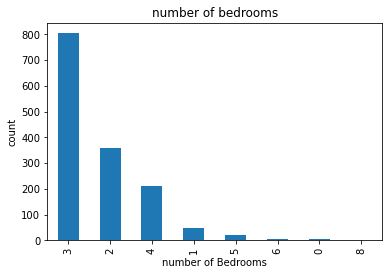

In [8]:
# check most common house (bedroom wise)
train_df['BedroomAbvGr'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('number of Bedrooms')
plt.ylabel('count')

Text(0, 0.5, 'count')

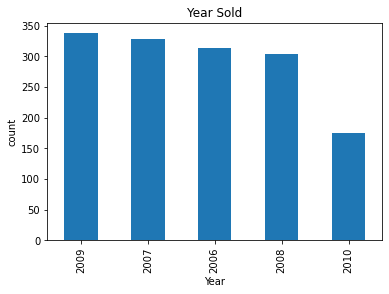

In [9]:
# check most common house (bedroom wise)
train_df['YrSold'].value_counts().plot(kind='bar')
plt.title('Year Sold')
plt.xlabel('Year')
plt.ylabel('count')

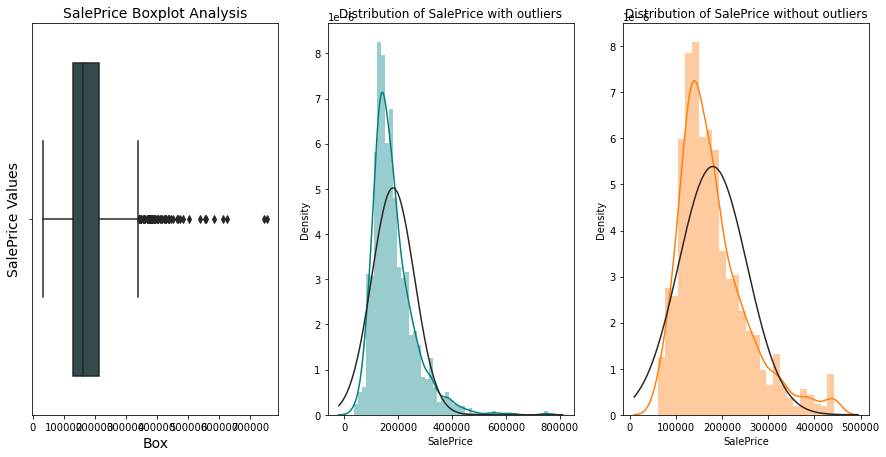

In [10]:
from scipy import stats; from scipy.stats import zscore, norm, randint

# %run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/Github/odp_plots.py'
%run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Github/odp_plots.py'
# Outlier, distribution for 'duration' column
Q3 = train_df['SalePrice'].quantile(0.75)
Q1 = train_df['SalePrice'].quantile(0.25)
IQR = Q3 - Q1

# print('Duration column', '--'*45)
# display(train_df.loc[(train_df['SalePrice'] < (Q1 - 1.5 * IQR)) | (train_df['SalePrice'] > (Q3 + 1.5 * IQR))].head())

odp_plots(train_df, 'SalePrice')


(-1.25, 1.25, -1.25, 1.25)

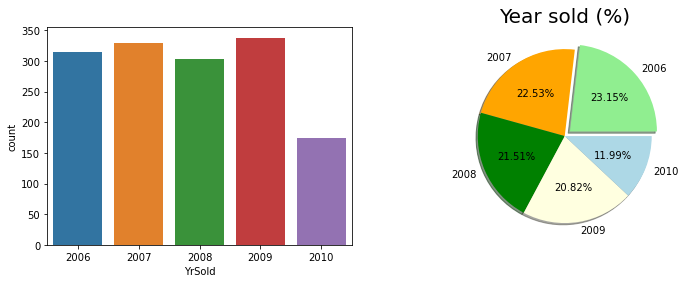

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

# sns.countplot(y='diagnosis', data=df, palette='Set2',ax=axes[0])
sns.countplot(train_df['YrSold'],label="Count",ax=axes[0])

labels = ['2006', '2007','2008','2009','2010']
size = train_df['YrSold'].value_counts()
colors = ['lightgreen', 'orange','green','lightyellow','lightblue']
explode = [0.08, 0,0,0,0]
# plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Year sold (%)', fontsize = 20)
plt.axis('off')

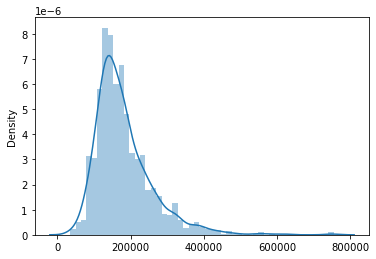

In [12]:
sns.distplot(x = (train_df["SalePrice"]))
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Checking more 700K homes

In [13]:
train_df[(train_df["SalePrice"]> 700000)].T


,691,1182
Id,692,1183
MSSubClass,60,60
MSZoning,RL,RL
LotFrontage,104,160
LotArea,21535,15623
...,...,...
MoSold,1,7
YrSold,2007,2007
SaleType,WD,WD
SaleCondition,Normal,Abnorml


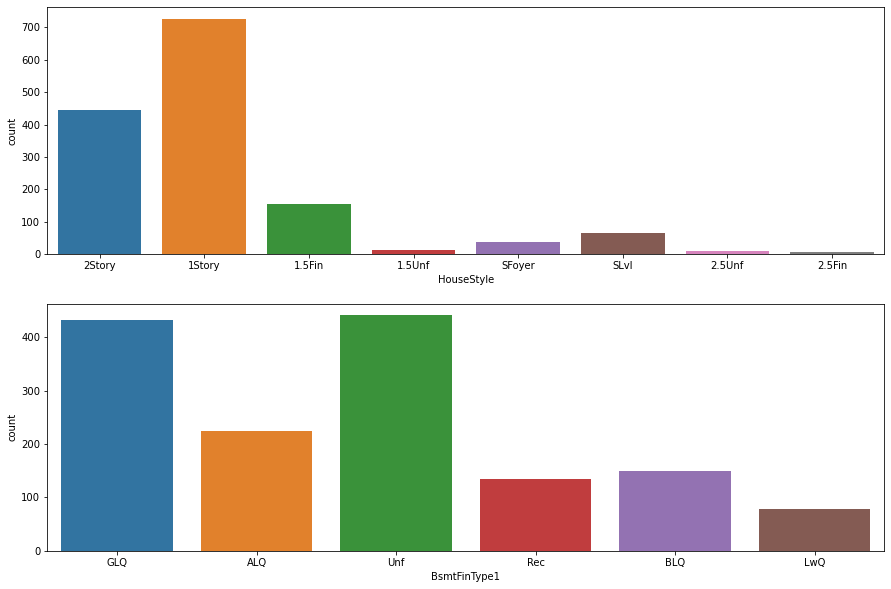

In [14]:
#Categorical variable
f, axes = plt.subplots(2, 1,figsize=(15, 10))
sns.countplot(x = train_df["HouseStyle"], ax=axes[0])
sns.countplot(x = train_df["BsmtFinType1"], ax=axes[1])
fig.tight_layout(pad=3.0)

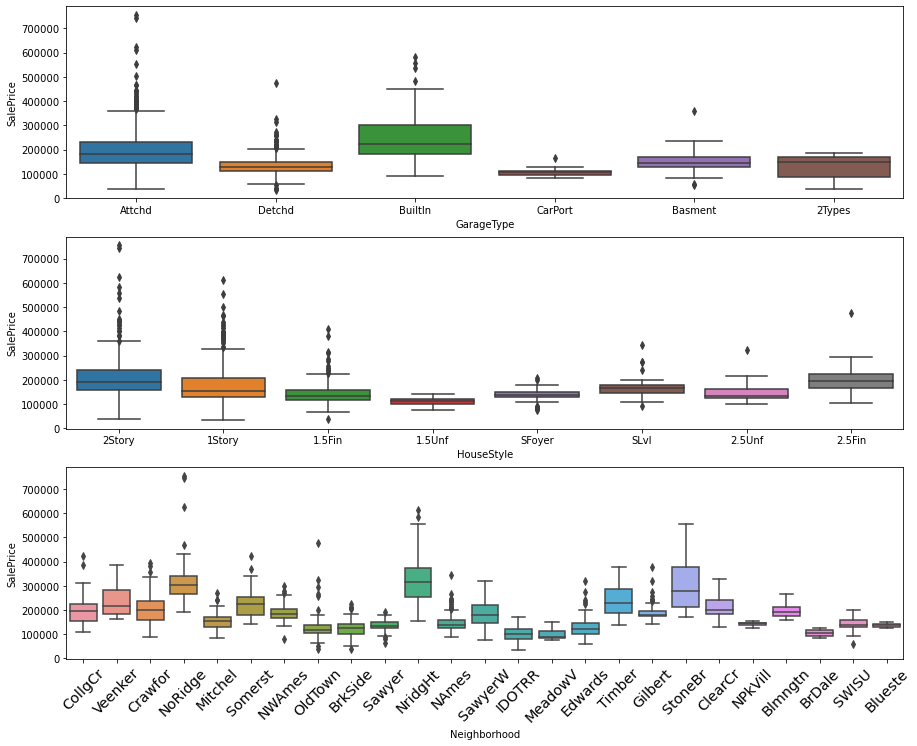

In [15]:
f, axes = plt.subplots(3, 1,figsize=(15, 12))

chart1 = sns.boxplot(x = train_df["GarageType"], y = train_df["SalePrice"],ax=axes[0])
chart2 = sns.boxplot(x = train_df["HouseStyle"], y = train_df["SalePrice"],ax=axes[1])
chart3 = sns.boxplot(x = train_df["Neighborhood"], y = train_df["SalePrice"],ax=axes[2])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, fontsize='x-large')
None

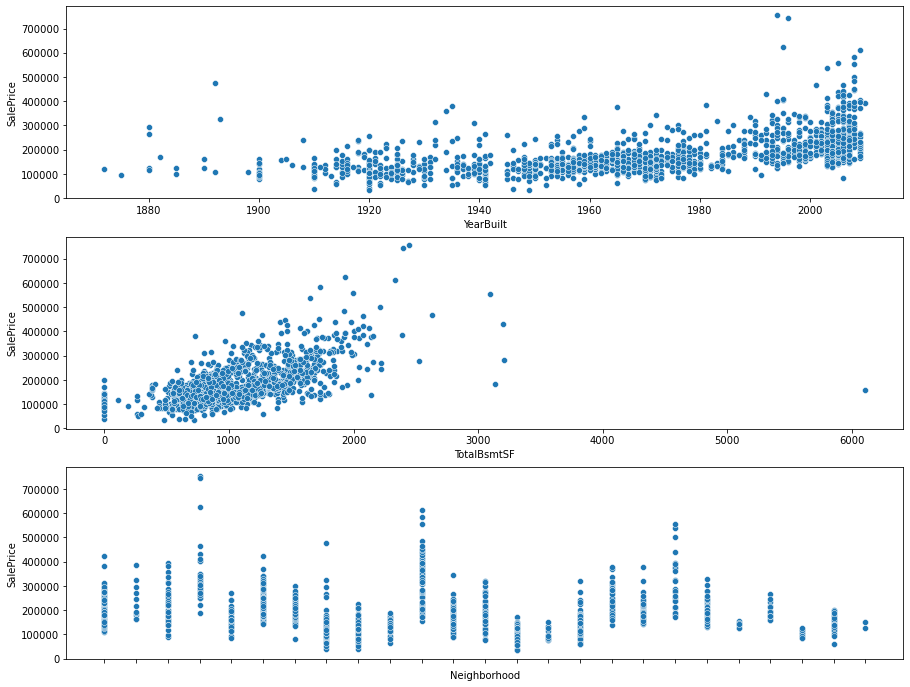

In [16]:
f, axes = plt.subplots(3, 1,figsize=(15, 12))

chart1 = sns.scatterplot(x = train_df["YearBuilt"], y = train_df["SalePrice"],ax=axes[0])
chart2 = sns.scatterplot(x = train_df["TotalBsmtSF"], y = train_df["SalePrice"],ax=axes[1])
chart3 = sns.scatterplot(x = train_df["Neighborhood"], y = train_df["SalePrice"],ax=axes[2])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45, fontsize='x-large')
None

In [17]:
# checking the outliers
print("Year Built (min, max)   : ",min(train_df["YearBuilt"]),max(train_df["YearBuilt"]))
print("Sale Price (min, max)   : ",min(train_df["SalePrice"]),max(train_df["SalePrice"]))

Year Built (min, max)   :  1872 2010
Sale Price (min, max)   :  34900 755000


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Correlation Matrix

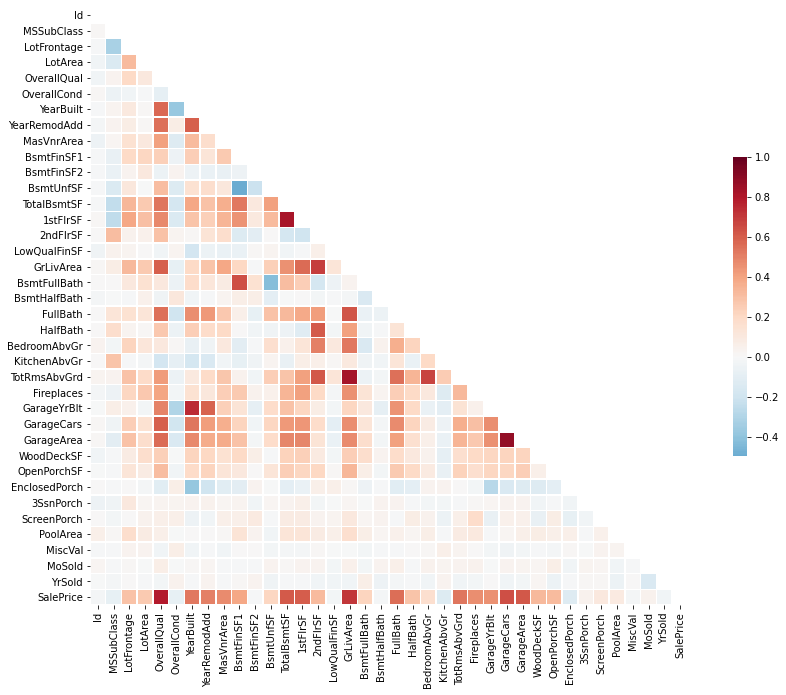

In [18]:
from string import ascii_letters
corr = train_df[numerical_cols].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False, cmap="RdBu_r")


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Strong correlation variables (GE 0.75 and LE -0.75)

In [19]:
#Here is the ><=0.75 correlation values
def corr_maxvals(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corr_maxvals(train_df[numerical_cols], .75)


OverallQual  SalePrice       0.790982
TotalBsmtSF  1stFlrSF        0.819530
GrLivArea    TotRmsAbvGrd    0.825489
GarageCars   GarageArea      0.882475
Id           Id                   NaN
dtype: float64

In [20]:
display(train_df.shape,test_df.shape)

(1460, 81)

(1459, 80)

In [21]:
#concatinate train and test data, first drop the 'SalePrice' from train data
# train.shape is (1460,81) and test.shape(1459,80)
# so, test dat is equal to train set. Here I am going to concat and split the dataset
from sklearn import preprocessing
%run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/Github/categorical2numerical.py'

train_df1 = train_df.drop('SalePrice',axis=1)

tot_data = pd.concat([train_df1,test_df])
display(tot_data.shape)

le = preprocessing.LabelEncoder()
categorical2numerical(tot_data)

(2919, 80)

In [22]:
display(train_df.shape,test_df.shape)

(1460, 81)

(1459, 80)

In [23]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,1,2,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,2,1,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,0,1,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,0,0,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,1,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,0,0,0,2,0,4,2010,8,4,142125


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Split the data into train and test data

In [24]:
from sklearn.model_selection import train_test_split
X = train_df.drop('SalePrice',axis = 1)
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 80), (292, 80), (1168,), (292,))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Checking columns

In [26]:
#if shapes are not same (columns) and remove excess ones
for col in list(X_train.columns):
    if col not in list(X_test.columns):
        X_train = X_train.drop([col], axis = 1)

X_train.shape, y_train.shape, X_test.shape

((1168, 80), (1168,), (292, 80))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#4a3dbb">Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, explained_variance_score

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

y_hat = linreg_model.predict(X_test)
y_hat_train = linreg_model.predict(X_train)
print('R_scored score:',linreg_model.score(X_train,y_train))
#Display Errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))

#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hat.mean())
print('Mean Selling Price:', y_test.mean())

R_scored score: 0.8447074990942126
Mean Absolute Error: 21575.57552405714
Root Mean Squared Error test: 34029.425467171335
Root Mean Squared Error train: 30434.354687640818
Mean Predicted Selling Price: 176794.99090670433
Mean Selling Price: 178839.81164383562


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">5-fold Cross Validation

In [28]:
#5-fold cross-validation score
from sklearn.model_selection import cross_val_score
def cross_validation(X, y):
    score = cross_val_score(LinearRegression(), X, y,cv=5, scoring="r2")
    print('R_squared Mean Score:',score.mean())
    print(score)
cross_validation(X,y)

R_squared Mean Score: 0.8080572573065574
[0.87622304 0.8119857  0.85362313 0.83650669 0.66194772]


- cross validation seems to be ok, eventhough I applied Recursive Feature Elimination (RFE)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Recursive Feature Elimination (RFE)

In [29]:
#Recursive Feature Elimination

from sklearn.svm import SVR
from sklearn.feature_selection import RFE
estimator = SVR(kernel="linear")
#Use RFE to remove not significant features from the initial model.
selector = RFE(estimator, step=1)
selector = selector.fit(X, y)
#Test new model
#New features dataframe containing only selected features through RFE
X_RFE = X[X.columns[selector.support_]]
# lin_reg(X_RFE, y)

display(X_RFE.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X_RFE, y, test_size=0.20, random_state=42)

linreg_RFE = LinearRegression()
linreg_RFE.fit(X_train, y_train)

y_hatrfe = linreg_RFE.predict(X_test)
y_hat_trainrfe = linreg_RFE.predict(X_train)
print('R_scored score:',linreg_RFE.score(X_train,y_train))
#Display Errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hatrfe))
print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hatrfe)))
print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_trainrfe)))

#Compare predicted and actual values
print('Mean Predicted Selling Price:', y_hatrfe.mean())
print('Mean Selling Price:', y_test.mean())

(1460, 40)

(1460,)

R_scored score: 0.8300016442334943
Mean Absolute Error: 21596.686529597875
Root Mean Squared Error test: 35013.48254284532
Root Mean Squared Error train: 31842.79757570732
Mean Predicted Selling Price: 176643.87899898872
Mean Selling Price: 178839.81164383562


In [30]:
cross_validation(X_RFE,y)

R_squared Mean Score: 0.8116240195698028
[0.87941341 0.81781242 0.84177795 0.84693282 0.67218349]


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">Regression and RFE_Regression estimated sale price check with expected values 

In [37]:
df_res = pd.DataFrame({
    "expected": y_test,
    "Reg_predicted":y_hat,
    "Reg_RFE_predict":y_hatrfe
})

In [38]:
df_res

,expected,Reg_predicted,Reg_RFE_predict
892,154500,151782.142714,146225.504597
1105,325000,318062.771068,335380.139113
413,115000,113880.638832,107335.172888
522,159000,181379.707945,175565.628941
1036,315500,320453.780602,329882.035783
...,...,...,...
479,89471,132109.238575,137469.248216
1361,260000,277198.585560,268276.807803
802,189000,216153.599195,219116.716047
651,108000,114830.229066,121161.430271


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#4a3dbb">House Sale price prediction using test dataset

In [39]:
test_pred = linreg_model.predict(test_df)

test_RFE = test_df[test_df.columns[selector.support_]]
test_RFEpred = linreg_RFE.predict(test_RFE)

#test file predictions
test_predict = pd.DataFrame({
    "Id": test_df['Id'],
    "test_predicted":test_pred,
    "test_predicted_RFE":test_RFEpred
})
test_predict

,Id,test_predicted,test_predicted_RFE
0,1461,104273.678653,117707.302322
1,1462,153255.280558,154536.081122
2,1463,165666.087248,165891.156516
3,1464,183207.514479,182369.191529
4,1465,190146.053794,200253.581939
...,...,...,...
1454,2915,60930.803526,70201.726996
1455,2916,59441.415876,67981.778008
1456,2917,139356.249246,138005.959752
1457,2918,113560.730703,123732.789910
